In [3]:
"""
analytical collisional spectroscopy
from
Classical line shapes based on analytical solutions of bimolecular trajectories in collision induced emission 
David Reguera; George Birnbaum
https://doi.org/10.1063/1.2371097
"""
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt

import utilities.reduced_parameter as red

/home/ribeirogroup/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ribeirogroup/miniconda3/envs/polariton_mm/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


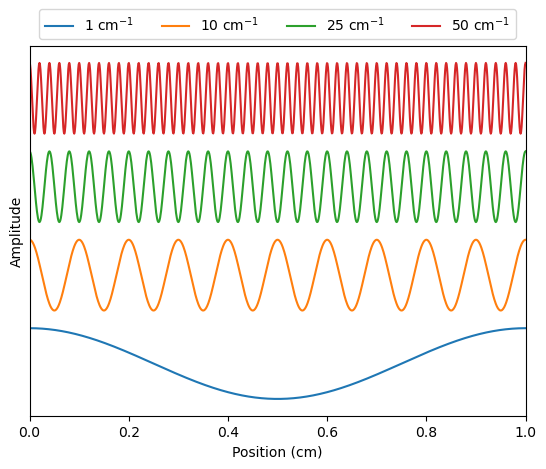

In [75]:
fig,ax = plt.subplots()

x = np.linspace(0,1, 1000)

n = 1
ax.plot(x, np.exp(1j * n * 2 * np.pi * x) + np.exp(-1j * n * 2 * np.pi * x), label = r'1 cm$^{-1}$')
n = 10
ax.plot(x, np.exp(1j * n * 2 * np.pi * x) + np.exp(-1j * n * 2 * np.pi * x) + 5, label = r'10 cm$^{-1}$')
n = 25
ax.plot(x, np.exp(1j * n * 2 * np.pi * x) + np.exp(-1j * n * 2 * np.pi * x) + 10, label = r'25 cm$^{-1}$')
n = 50
ax.plot(x, np.exp(1j * n * 2 * np.pi * x) + np.exp(-1j * n * 2 * np.pi * x) + 15, label = r'50 cm$^{-1}$')

ax.set_xlim(0,1)
ax.get_yaxis().set_ticks([])
ax.set_xlabel('Position (cm)')
ax.set_ylabel('Amplitude')

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=4)
fig.savefig('figure/presentation/wave.jpeg',dpi=600,bbox_inches = 'tight')

In [62]:
E = sm.symbols('E')
D = 1 #sm.symbols('D')
p = 1 + E/D
w0 = sm.symbols('omega_0')
w = sm.symbols('omega')
k = sm.symbols('kappa')

g = sm.sqrt(w0 * (p - 1))

In [63]:
F = w**4 * sm.sinh((w/g) * sm.acos(-1 / sm.sqrt(p))) / sm.sinh(w * sm.pi/g)
#F = w**4 * sm.sinh((w/g) * (sm.pi - sm.sqrt(p - 1)**0.5 + (1/3) * (p-1)**(3/2)) ) / sm.sinh(w * sm.pi/g)
#F = w**4 * sm.sech(w * sm.pi / (2 * g))
F

omega**4*sinh(omega*acos(-1/sqrt(E + 1))/sqrt(E*omega_0))/sinh(pi*omega/sqrt(E*omega_0))

In [64]:
dF = sm.diff(F, w)
sm.simplify(dF)

omega**3*(4*E*omega_0*sinh(omega*acos(-1/sqrt(E + 1))/sqrt(E*omega_0)) - pi*omega*sqrt(E*omega_0)*sinh(omega*acos(-1/sqrt(E + 1))/sqrt(E*omega_0))/tanh(pi*omega/sqrt(E*omega_0)) + omega*sqrt(E*omega_0)*cosh(omega*acos(-1/sqrt(E + 1))/sqrt(E*omega_0))*acos(-1/sqrt(E + 1)))/(E*omega_0*sinh(pi*omega/sqrt(E*omega_0)))

In [58]:
4 * sm.sqrt(E*w0) / (sm.pi - sm.acos(-1/(sm.sqrt(E+1)))) * sm.tanh(sm.pi * w)

4*sqrt(E*omega_0)/(pi - acos(-1/sqrt(E + 1)))

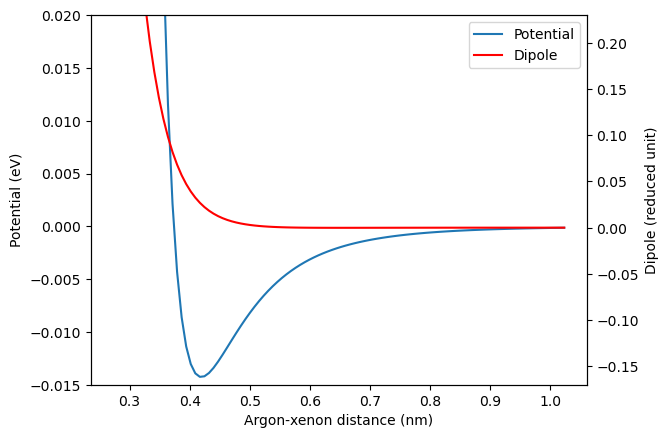

In [59]:
potential_function = lambda r:  4 * red.epsilon_Ar_Xe \
            * ( (red.sigma_Ar_Xe/r)**12 - (red.sigma_Ar_Xe/r)**6 )

dipole_function = lambda distance: red.mu0 * np.exp(-red.a * (distance - red.d0)) - red.d7/distance**7


fig,ax = plt.subplots()

R = np.linspace(0.8,3,100)
ax.plot(
    R * red.sigma * 1e7, 
    red.convert_energy(potential_function(R),'ev'),
    label = 'Potential'
)
ax.plot(
    [], [],
    label = 'Dipole',
    c = 'r' 
)
tax = ax.twinx()
tax.plot(
    R * red.sigma * 1e7, 
    dipole_function(R), 
    c = 'r'
)

tax.set_ylabel('Dipole (reduced unit)')

ax.set_xlabel('Argon-xenon distance (nm)')
ax.set_ylabel('Potential (eV)')
ax.set_ylim(-0.015,0.02)
tax.set_ylim(-0.17,0.23)

ax.legend()

fig.savefig('potential.jpeg',dpi = 600, bbox_inches = 'tight')